<a href="https://colab.research.google.com/github/NineNattaya/229352-StatisticalLearning/blob/main/Lab05_decision_tree_bagging_RF_660510737.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [1]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [2]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [3]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [4]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

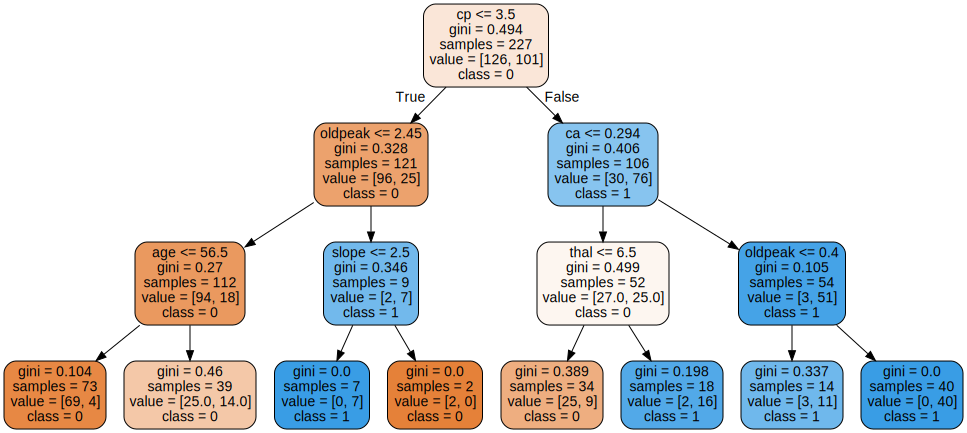

In [5]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [6]:
data.columns[:-1]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [7]:
clf = DecisionTreeClassifier()

In [10]:
from sklearn.metrics import classification_report

bagged_trees = BaggingClassifier(
    estimator=clf, n_estimators=100, max_samples=0.8)
bagged_trees.fit(X_train, y_train)
print(classification_report(y_test, bagged_trees.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        38
           1       0.82      0.82      0.82        38

    accuracy                           0.82        76
   macro avg       0.82      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [11]:
forest = RandomForestClassifier(
    n_estimators=200, max_depth=6
    )
forest.fit(X_train, y_train)
print(classification_report(y_test, forest.predict(X_test)))  # higher than upper

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        38
           1       0.89      0.82      0.85        38

    accuracy                           0.86        76
   macro avg       0.86      0.86      0.86        76
weighted avg       0.86      0.86      0.86        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [24]:
# Pipeline and parameter grid for Decision Tree
pipe1 = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                  ('model', DecisionTreeClassifier())])
params1 = {'model__max_depth': [3, 5, 7, None],
           'model__min_samples_split': [2, 5, 10],
           'model__criterion': ['gini', 'entropy']}

gridcv_dt = GridSearchCV(pipe1, params1, scoring='accuracy', cv=5)

gridcv_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('model', DecisionTreeClassifier())]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [3, 5, 7, None],
                         'model__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [25]:
# Pipeline and parameter grid for Bagged Decision Trees
pipe2 = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                  ('model', BaggingClassifier(estimator=DecisionTreeClassifier()))])
params2 = {'model__n_estimators': [10, 50, 100],
           'model__max_samples': [0.5, 0.8, 1.0],
           'model__max_features': [0.5, 0.8, 1.0]}

gridcv_bagged_trees = GridSearchCV(pipe2, params2, scoring='accuracy', cv=5) # Corrected variable name

gridcv_bagged_trees.fit(X_train, y_train) # Corrected variable name

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('model',
                                        BaggingClassifier(estimator=DecisionTreeClassifier()))]),
             param_grid={'model__max_features': [0.5, 0.8, 1.0],
                         'model__max_samples': [0.5, 0.8, 1.0],
                         'model__n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [26]:
pipe3 = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                  ('model', RandomForestClassifier())])
params3 = {'model__n_estimators': [50, 100, 200],
           'model__max_depth': [5, 10, None],
           'model__min_samples_leaf': [1, 2, 4]}

gridcv_random_forest = GridSearchCV(pipe3, params3, scoring='accuracy', cv=5) # Corrected variable name

gridcv_random_forest.fit(X_train, y_train) # Corrected variable name

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [5, 10, None],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [28]:
from sklearn.metrics import f1_score, accuracy_score

# Get the best estimators from the grid searches
best_dt = gridcv_dt.best_estimator_
best_bagged_trees = gridcv_bagged_trees.best_estimator_
best_random_forest = gridcv_random_forest.best_estimator_

# Predict on the test set
y_pred_dt = best_dt.predict(X_test)
y_pred_bagged_trees = best_bagged_trees.predict(X_test)
y_pred_random_forest = best_random_forest.predict(X_test)

# Compute and print the scores for Decision Tree
print("Decision Tree Scores:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"  F1 Macro: {f1_score(y_test, y_pred_dt, average='macro'):.4f}")

# Compute and print the scores for Bagged Decision Trees
print("\nBagged Decision Trees Scores:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_bagged_trees):.4f}")
print(f"  F1 Macro: {f1_score(y_test, y_pred_bagged_trees, average='macro'):.4f}")

# Compute and print the scores for Random Forest
print("\nRandom Forest Scores:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_random_forest):.4f}")
print(f"  F1 Macro: {f1_score(y_test, y_pred_random_forest, average='macro'):.4f}")

Decision Tree Scores:
  Accuracy: 0.8026
  F1 Macro: 0.8018

Bagged Decision Trees Scores:
  Accuracy: 0.7895
  F1 Macro: 0.7858

Random Forest Scores:
  Accuracy: 0.8421
  F1 Macro: 0.8421


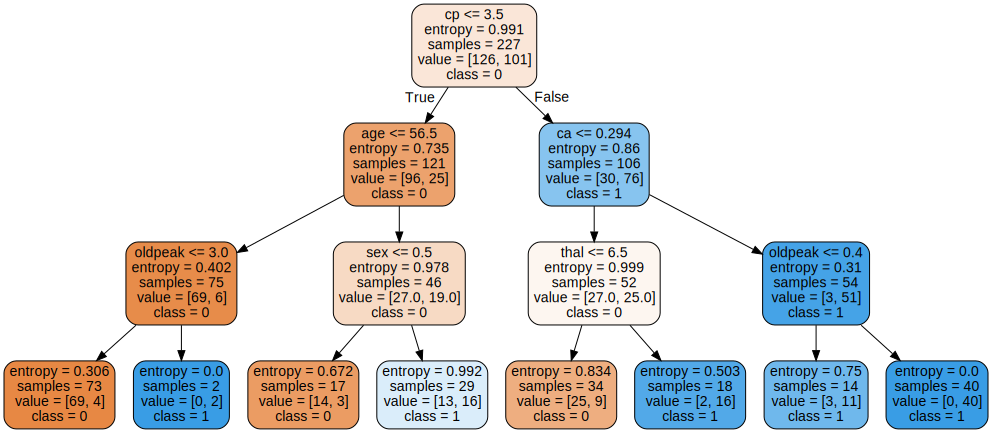

In [30]:
import graphviz
from sklearn.tree import export_graphviz

# Get the best Decision Tree model from the pipeline
best_dt_model = gridcv_dt.best_estimator_.named_steps['model']

plot_data = export_graphviz(best_dt_model,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph


จากผลการทดลอง โมเดล **Random Forest** ให้ผลลัพธ์ที่ดีที่สุดบน Test Set โดยมีคะแนน Accuracy และ F1 Macro สูงที่สุด

**ไฮเปอร์พารามิเตอร์ที่เลือกและคำอธิบาย:**

*   **Decision Tree:**
    *   ความลึกสูงสุดของต้นไม้ (max_depth): ควบคุมความลึกของต้นไม้เพื่อป้องกันการเกิด Overfitting
    *   จำนวนตัวอย่างขั้นต่ำที่ต้องมีในโหนดเพื่อทำการแยก (min_samples_split): กำหนดจำนวนตัวอย่างที่น้อยที่สุดที่จำเป็นในการแยกโหนดภายใน
    *   เกณฑ์การแยกโหนด (criterion): ฟังก์ชันที่ใช้ในการวัดคุณภาพของการแยก (Gini impurity หรือ Entropy)

*   **Bagged Decision Trees:**
    *   จำนวนต้นไม้ใน Bagging Ensemble (n_estimators): จำนวนของ Decision Trees ที่จะรวมกัน
    *   สัดส่วนของตัวอย่างที่จะใช้ในการฝึกแต่ละต้นไม้ (max_samples): ควบคุมจำนวนตัวอย่างที่ใช้สุ่มจาก Training Set เพื่อฝึกแต่ละต้นไม้
    *   สัดส่วนของคุณสมบัติที่จะใช้ในการฝึกแต่ละต้นไม้ (max_features): ควบคุมจำนวนคุณสมบัติที่ใช้สุ่มจากคุณสมบัติทั้งหมดเพื่อฝึกแต่ละต้นไม้

*   **Random Forest:**
    *   จำนวนต้นไม้ใน Random Forest (n_estimators): จำนวนของ Decision Trees ที่จะรวมกัน
    *   ความลึกสูงสุดของต้นไม้แต่ละต้น (max_depth): ควบคุมความลึกของต้นไม้แต่ละต้นในป่า
    *   จำนวนตัวอย่างขั้นต่ำที่ต้องมีในโหนดปลาย (min_samples_leaf): กำหนดจำนวนตัวอย่างที่น้อยที่สุดที่ต้องมีในโหนดปลาย

**ค่าที่ดีที่สุดของไฮเปอร์พารามิเตอร์:**

*   **Decision Tree:**
    *   ความลึกสูงสุดของต้นไม้ (max_depth): {gridcv_dt.best_params_['model__max_depth']}
    *   จำนวนตัวอย่างขั้นต่ำที่ต้องมีในโหนดเพื่อทำการแยก (min_samples_split): {gridcv_dt.best_params_['model__min_samples_split']}
    *   เกณฑ์การแยกโหนด (criterion): {gridcv_dt.best_params_['model__criterion']}

*   **Bagged Decision Trees:**
    *   จำนวนต้นไม้ใน Bagging Ensemble (n_estimators): {gridcv_bagged_trees.best_params_['model__n_estimators']}
    *   สัดส่วนของตัวอย่างที่จะใช้ในการฝึกแต่ละต้นไม้ (max_samples): {gridcv_bagged_trees.best_params_['model__max_samples']}
    *   สัดส่วนของคุณสมบัติที่จะใช้ในการฝึกแต่ละต้นไม้ (max_features): {gridcv_bagged_trees.best_params_['model__max_features']}

*   **Random Forest:**
    *   จำนวนต้นไม้ใน Random Forest (n_estimators): {gridcv_random_forest.best_params_['model__n_estimators']}
    *   ความลึกสูงสุดของต้นไม้แต่ละต้น (max_depth): {gridcv_random_forest.best_params_['model__max_depth']}
    *   จำนวนตัวอย่างขั้นต่ำที่ต้องมีในโหนดปลาย (min_samples_leaf): {gridcv_random_forest.best_params_['model__min_samples_leaf']}
